**This Exercise shows how to use Google colab to apply regression models.**
**Copy the Colab notebook and data to your google drive before proceeding.**

Step 1: Connect Google drive that stores the data with your Google Colab Notebook

In [1]:
import numpy as np
import numpy.matlib as matlib
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials


In [2]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)


Replace the ID with ID of file you want to access. To get this ID: 

1.   Right-click on the name of the appropriate file in your Google Drive
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary argument of the call to `drive.CreateFile()` as the value associated with the 'id' key. Make sure that this value is a string.



In [3]:
# Replace the ID with ID of file you want to access
# To get this ID, right-click on the name of the appropriate file in your 
#downloaded = drive.CreateFile({'id':'1uhaemiBL_mWEHTilB1tWmE8G9gD5IJgp'}) 
#downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

Step 2: Read the Data and verify its format!

In [4]:
import pandas as pd
data = pd.read_csv('time_series_covid_19_confirmed.csv') 
print("The shape of data=",data.shape)
data.head()

The shape of data= (266, 225)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


Step 3: Original data has [266x225] dimensions. Let's use only 50 rows and 100 columns.

In [5]:
rows=266
cols=100
data_new=data.iloc[0:rows,4:cols+4]
print(data_new.shape)

(266, 100)


In [6]:
#view the sub-sectioned data
data_new.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Step 4: Convert the Tablular data to format {X,Y}, where X={Longitude, Latitude, Date}, Y={#infected}

In [7]:
# Finding the date indices
import matplotlib.pyplot as plt
data_row=data_new.sum(axis=0)
days=range(0,data_row.shape[0])
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(days_mat.shape)

(266, 100)


In [8]:
# Let's create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date, Y=#affected
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1)))

In [9]:
print(np.shape(X))
#Data Preparation is Done!

(26600, 3)


Step 5: Let's Plot the Data to see the converted Data format!

(26600, 3)


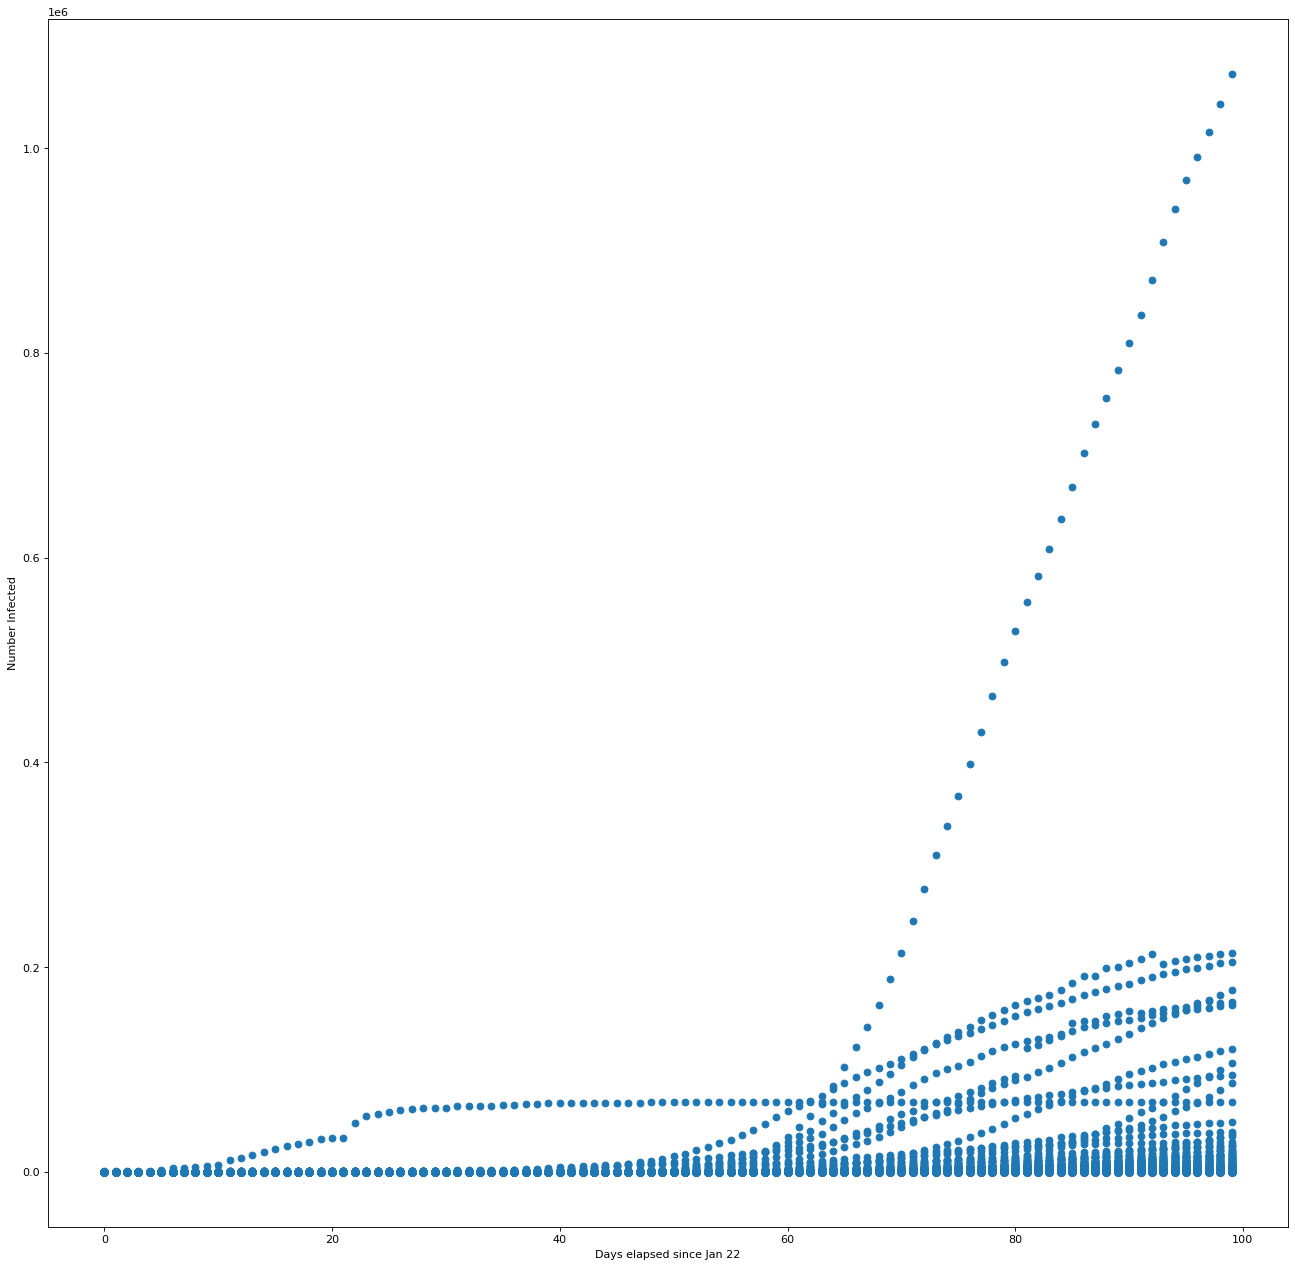

In [10]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

Step 6: Let's spilt the data to training and test (70% train, 30% test)

In [11]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

Step 7: Let's fit Polynomial features of degree 3 to the features. This results in dimensions going from 3 to 20!

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (7980, 20)
Linear Regression Coefficients are= [[ 0.00000000e+00  1.08195512e+02 -8.71484631e+00  3.30917339e+01
   2.20377196e+00  2.99669211e-01 -3.10917313e+00 -7.66337768e-02
   2.15786083e+00 -3.15576805e+00 -7.42616605e-02  3.12719044e-03
   1.43317729e-02  1.43412794e-04 -1.98682060e-02  6.46817673e-02
  -1.64113263e-03  4.98198787e-03 -3.00181677e-02  3.44067676e-02]]
constant coefficient= [-739.12870003]


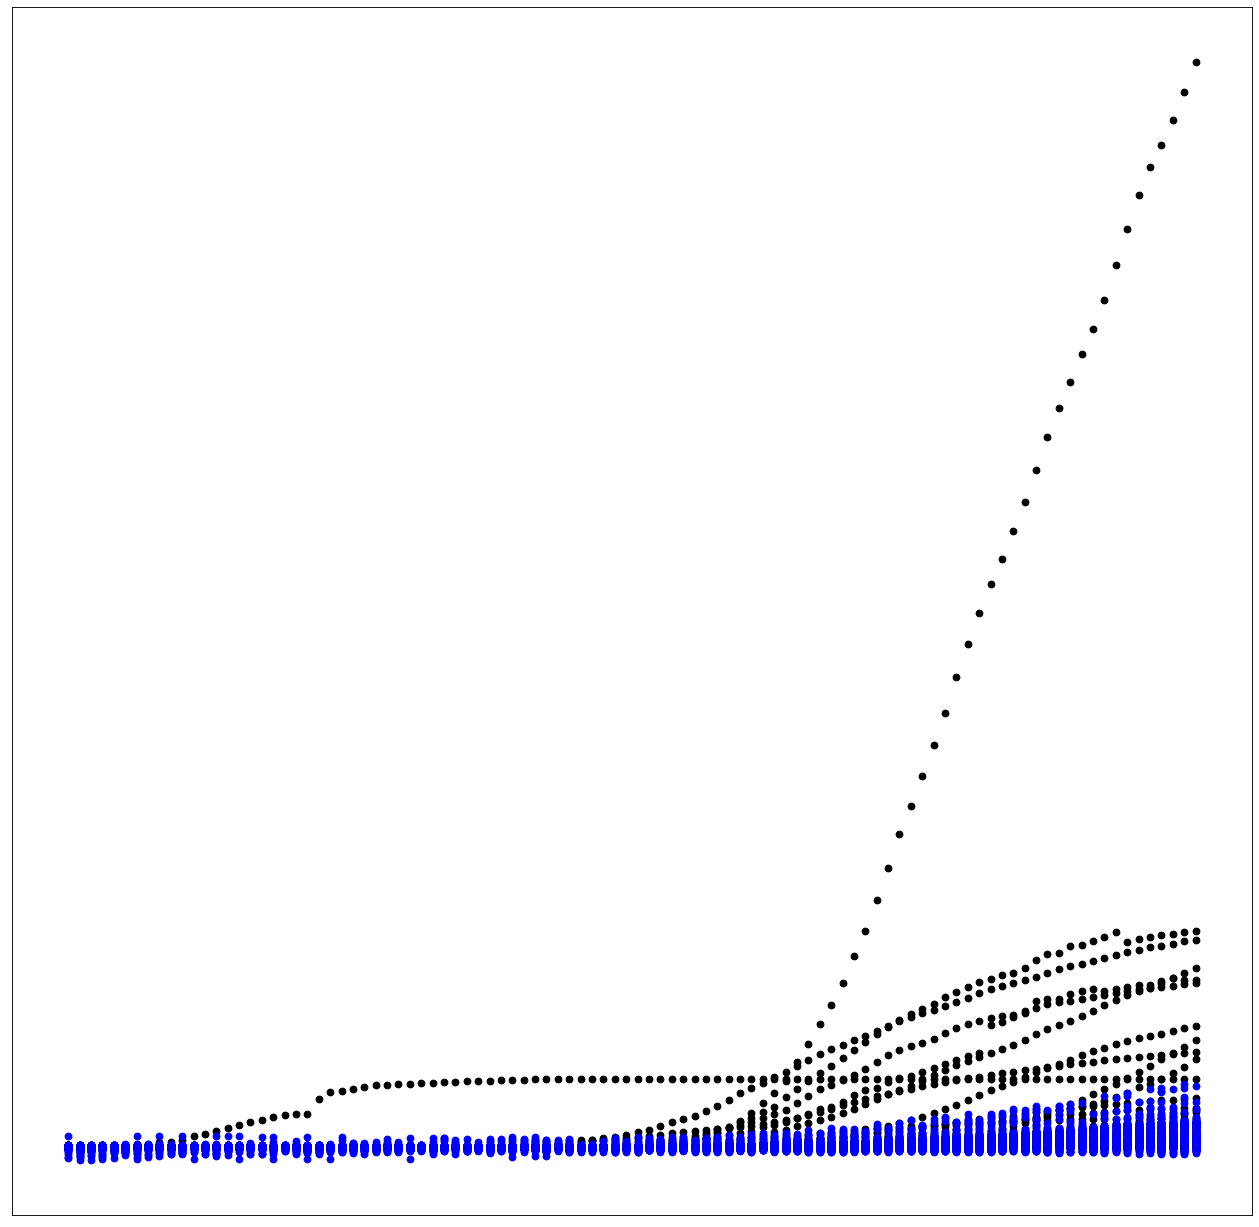

In [13]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In the image above, black points are training and blue ones are test!

In [14]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, y_pred))

590117458.2663465


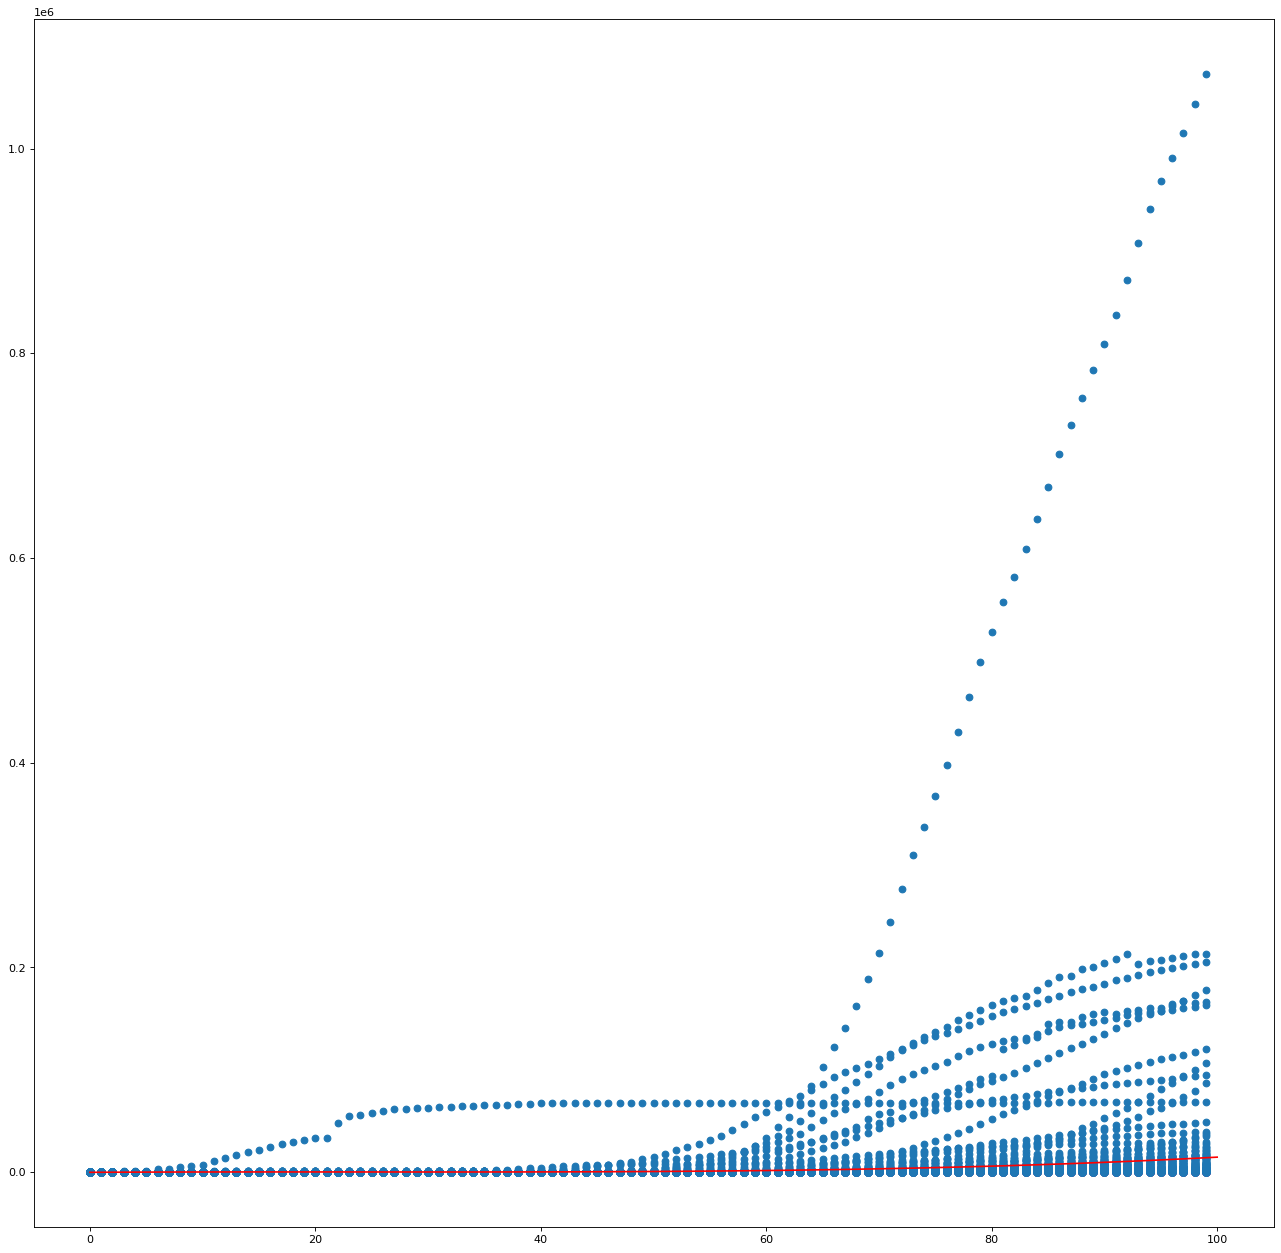

In [15]:
# 1D polynomial regression
model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))

model_x = np.linspace(0, 100, 100)
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.plot(model_x, model(model_x),'r')
plt.show()

In [16]:
import sys
lowestError = sys.float_info.max
lowestDegree = 1000

for aNumber in range(2, 30):
    poly = PolynomialFeatures(degree=aNumber)
    # Transform both the train and test data
    X_train = poly.fit_transform(X_train_1)
    X_test = poly.fit_transform(X_test_1)
    #print("New shape of test data=",np.shape(X_test))

    clf = LinearRegression()
    # Fit the model on train data only
    clf.fit(X_train, y_train)
    #    #print("Linear Regression Coefficients are=",clf.coef_)
    #    print("constant coefficient=",clf.intercept_)
    y_pred = clf.predict(X_test)
    print('degree ', aNumber)
    err = mse(y_test, y_pred)
    if err < lowestError:
        lowestError = err
        lowestDegree = aNumber
    print("Lowest degree ", lowestDegree)
    print('lowest error ', lowestError)

degree  2
Lowest degree  2
lowest error  594035751.3547195
degree  3
Lowest degree  3
lowest error  590117458.2663465
degree  4
Lowest degree  4
lowest error  580506402.3302597
degree  5
Lowest degree  5
lowest error  560518228.4662647
degree  6
Lowest degree  6
lowest error  540203756.2889426
degree  7
Lowest degree  7
lowest error  505504578.81443673
degree  8
Lowest degree  8
lowest error  423113369.00077564
degree  9
Lowest degree  9
lowest error  323357628.54951566
degree  10
Lowest degree  10
lowest error  262914565.25333756
degree  11
Lowest degree  10
lowest error  262914565.25333756
degree  12
Lowest degree  10
lowest error  262914565.25333756
degree  13
Lowest degree  13
lowest error  134910217.14720494
degree  14
Lowest degree  13
lowest error  134910217.14720494
degree  15
Lowest degree  13
lowest error  134910217.14720494
degree  16
Lowest degree  13
lowest error  134910217.14720494
degree  17
Lowest degree  17
lowest error  124100421.769208
degree  18
Lowest degree  17
lo

KeyboardInterrupt: 

Assignment: Report the mean squared error for prediction using differnt degrees of Polynomial Regression
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

1. Report the best model for this data  
 20: 13978.59714422153, I tried running it to 50, but cut it off around 30
 because the numbers were getting worse, not better
2. Repeat for complete data (Change step 3) and report the best model  
  17: 124100421.769208, again I stopped the trial of different degrees of polynomials at 25 due to increasing error
 
